## Problem 9(Random)

In [467]:
data9=pd.read_csv(r"C:\Users\harsh\Downloads\data (1)\demo_data\9.random.csv",header=None)

In [468]:
data9.head()

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


In [469]:
data9.corr()

,0,1,2
0,1.000000,0.469878,-0.018720
1,0.469878,1.000000,-0.021668
2,-0.018720,-0.021668,1.000000


In [470]:
data9[2].value_counts()

1.0    202
0.0    198
Name: 2, dtype: int64

In [471]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data9[[0,1]],data9[2],test_size=0.15)

In [472]:
from sklearn.preprocessing import StandardScaler
scaler9=StandardScaler()
data_rescaled=scaler9.fit_transform(X_train)

In [642]:
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model9=Sequential()

In [643]:
model9.add(Dense(3,activation="sigmoid",input_dim=2))
model9.add(Dense(2,activation="sigmoid"))
model9.add(Dense(1,activation="sigmoid"))

In [644]:
model9.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_257 (Dense)           (None, 3)                 9         
                                                                 
 dense_258 (Dense)           (None, 2)                 8         
                                                                 
 dense_259 (Dense)           (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [645]:
model9.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [647]:
save_=model9.fit(X_train,y_train,batch_size=10,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
28/28 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5147 - val_loss: 0.6969 - val_accuracy: 0.4412
Epoch 2/50
28/28 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5147 - val_loss: 0.6965 - val_accuracy: 0.4412
Epoch 3/50
28/28 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5110 - val_loss: 0.6959 - val_accuracy: 0.3971
Epoch 4/50
28/28 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5147 - val_loss: 0.6966 - val_accuracy: 0.4412
Epoch 5/50
28/28 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5147 - val_loss: 0.6969 - val_accuracy: 0.4412
Epoch 6/50
28/28 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5147 - val_loss: 0.6963 - val_accuracy: 0.4265
Epoch 7/50
28/28 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5147 - val_loss: 0.6973 - val_accuracy: 0.4412
Epoch 8/50
28/28 [==

In [648]:
train_loss=save_.history['loss']
cv_loss=save_.history['val_loss']

In [649]:
len(train_loss)

50

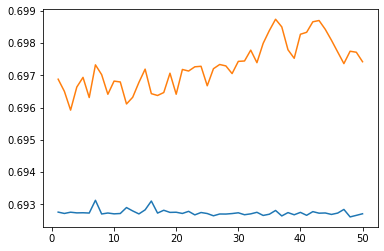

In [651]:
plt.plot(range(1,51),train_loss,label="training_loss")
plt.plot(range(1,51),cv_loss,label="crossval_loss")
plt.legend()

In [652]:
pred_=model9.predict(X_train)

11/11 [==============================] - 0s 1ms/step


In [653]:
pred_=np.ravel(np.where(pred_<0.5,0,1))
pred_=pd.Series(pred_)
pred_.index=y_train.index
pred_

334    1
305    1
239    1
344    1
111    1
      ..
269    1
207    1
397    1
122    1
372    1
Length: 340, dtype: int32

<AxesSubplot:xlabel='0', ylabel='1'>

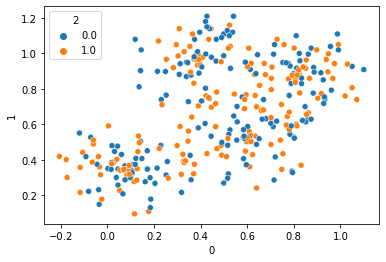

In [654]:
sns.scatterplot(x=X_train[0],y=X_train[1],hue=y_train)

<AxesSubplot:xlabel='0', ylabel='1'>

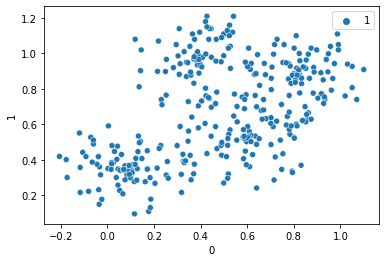

In [655]:
sns.scatterplot(x=X_train[0],y=X_train[1],hue=pred_)

In [656]:
metrics.accuracy_score(y_train,pred_)

0.5

In [657]:
model9.get_weights()

[array([[-1.0243554 , -0.7512881 , -0.04602498],
        [-0.53476256,  0.28137287, -0.7038643 ]], dtype=float32),
 array([-0.06093809,  0.04269677,  0.06288614], dtype=float32),
 array([[ 0.6749968 , -0.7589919 ],
        [-0.90519214, -0.40523228],
        [-0.5196131 , -0.12369993]], dtype=float32),
 array([-0.04486558,  0.03996726], dtype=float32),
 array([[-0.8705422],
        [ 0.8815626]], dtype=float32),
 array([0.03768503], dtype=float32)]

In [658]:
model9.get_weights()[0]

array([[-1.0243554 , -0.7512881 , -0.04602498],
       [-0.53476256,  0.28137287, -0.7038643 ]], dtype=float32)

In [659]:
model9.get_weights()[0].shape

(2, 3)

In [660]:
model9.get_weights()[5].shape

(1,)

In [661]:
np.zeros(model9.get_weights()[0].shape)

array([[0., 0., 0.],
       [0., 0., 0.]])

In [662]:
initial_weights = model9.get_weights()

In [663]:
initial_weights 

[array([[-1.0243554 , -0.7512881 , -0.04602498],
        [-0.53476256,  0.28137287, -0.7038643 ]], dtype=float32),
 array([-0.06093809,  0.04269677,  0.06288614], dtype=float32),
 array([[ 0.6749968 , -0.7589919 ],
        [-0.90519214, -0.40523228],
        [-0.5196131 , -0.12369993]], dtype=float32),
 array([-0.04486558,  0.03996726], dtype=float32),
 array([[-0.8705422],
        [ 0.8815626]], dtype=float32),
 array([0.03768503], dtype=float32)]

In [664]:
initial_weights[0] = np.zeros(model9.get_weights()[0].shape)
initial_weights[1] = np.zeros(model9.get_weights()[1].shape)
initial_weights[2] = np.zeros(model9.get_weights()[2].shape)
initial_weights[3] = np.zeros(model9.get_weights()[3].shape)
initial_weights[4] = np.zeros(model9.get_weights()[4].shape)
initial_weights[5] = np.zeros(model9.get_weights()[5].shape)

In [665]:
model9.set_weights(initial_weights)

In [666]:
model9.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0., 0.],
        [0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [667]:
model9.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [668]:
save_=model9.fit(X_train,y_train,batch_size=10,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
28/28 [==============================] - 1s 5ms/step - loss: 0.6933 - accuracy: 0.4412 - val_loss: 0.6931 - val_accuracy: 0.5588
Epoch 2/50
28/28 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4632 - val_loss: 0.6934 - val_accuracy: 0.4412
Epoch 3/50
28/28 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5147 - val_loss: 0.6941 - val_accuracy: 0.4412
Epoch 4/50
28/28 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5147 - val_loss: 0.6942 - val_accuracy: 0.4412
Epoch 5/50
28/28 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5147 - val_loss: 0.6945 - val_accuracy: 0.4412
Epoch 6/50
28/28 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5147 - val_loss: 0.6950 - val_accuracy: 0.4412
Epoch 7/50
28/28 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5147 - val_loss: 0.6946 - val_accuracy: 0.4412
Epoch 8/50
28/28 [==

In [669]:
model9.get_weights()

[array([[-0.0471206 , -0.04712057, -0.04712057],
        [-0.09126054, -0.09126052, -0.09126052]], dtype=float32),
 array([-0.09281357, -0.09281361, -0.09281361], dtype=float32),
 array([[0.00245235, 0.00245235],
        [0.00245234, 0.00245234],
        [0.00245234, 0.00245234]], dtype=float32),
 array([0.00239022, 0.00239022], dtype=float32),
 array([[0.03178186],
        [0.03178186]], dtype=float32),
 array([0.03226541], dtype=float32)]

In [670]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 2s 496us/step


C:\Users\harsh\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

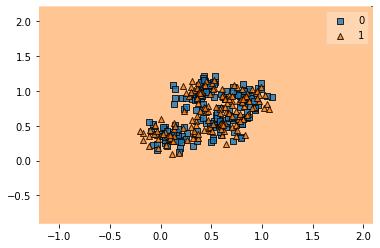

In [671]:
plot_decision_regions(X_train[[0,1]].values,y_train.values.astype(int),clf=model9)

#### Using batch normalization and weights initialization

In [586]:
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model9_=Sequential()

In [590]:
model9_.add(Dense(5,activation="relu",input_dim=2, kernel_initializer='glorot_normal'))
model9_.add(Dense(4,activation="relu", kernel_initializer='glorot_normal'))
model9_.add(Dense(3,activation="relu", kernel_initializer='glorot_normal'))
model9_.add(Dense(2,activation="relu", kernel_initializer='glorot_normal'))
model9_.add(BatchNormalization())
model9_.add(Dense(1,activation="sigmoid"))

In [591]:
model9_.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [592]:
model9_.fit(X_train,y_train,batch_size=10,epochs=300,verbose=1,validation_split=0.2)

Epoch 1/300
28/28 [==============================] - 1s 6ms/step - loss: 0.7396 - accuracy: 0.5037 - val_loss: 0.6911 - val_accuracy: 0.5882
Epoch 2/300
28/28 [==============================] - 0s 2ms/step - loss: 0.7230 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.5441
Epoch 3/300
28/28 [==============================] - 0s 3ms/step - loss: 0.7085 - accuracy: 0.4963 - val_loss: 0.6942 - val_accuracy: 0.4853
Epoch 4/300
28/28 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.5257 - val_loss: 0.6964 - val_accuracy: 0.4265
Epoch 5/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.4853 - val_loss: 0.6980 - val_accuracy: 0.4412
Epoch 6/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5110 - val_loss: 0.6990 - val_accuracy: 0.4118
Epoch 7/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5147 - val_loss: 0.6992 - val_accuracy: 0.4265
Epoch 8/300
2

Epoch 59/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5368 - val_loss: 0.6971 - val_accuracy: 0.5882
Epoch 60/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5184 - val_loss: 0.6964 - val_accuracy: 0.5735
Epoch 61/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5074 - val_loss: 0.6957 - val_accuracy: 0.5588
Epoch 62/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5184 - val_loss: 0.6968 - val_accuracy: 0.5588
Epoch 63/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5551 - val_loss: 0.7077 - val_accuracy: 0.4412
Epoch 64/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5294 - val_loss: 0.7095 - val_accuracy: 0.5000
Epoch 65/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5441 - val_loss: 0.7096 - val_accuracy: 0.5000
Epoch 

28/28 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5478 - val_loss: 0.6918 - val_accuracy: 0.5147
Epoch 174/300
28/28 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5221 - val_loss: 0.6902 - val_accuracy: 0.5588
Epoch 175/300
28/28 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.5515 - val_loss: 0.6975 - val_accuracy: 0.5294
Epoch 176/300
28/28 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5404 - val_loss: 0.7031 - val_accuracy: 0.5147
Epoch 177/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5515 - val_loss: 0.6991 - val_accuracy: 0.5294
Epoch 178/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5257 - val_loss: 0.6884 - val_accuracy: 0.5294
Epoch 179/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5478 - val_loss: 0.6877 - val_accuracy: 0.5735
Epoch 180/300

28/28 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5257 - val_loss: 0.7051 - val_accuracy: 0.4706
Epoch 288/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5404 - val_loss: 0.7037 - val_accuracy: 0.5000
Epoch 289/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5257 - val_loss: 0.7080 - val_accuracy: 0.5000
Epoch 290/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5625 - val_loss: 0.7107 - val_accuracy: 0.5000
Epoch 291/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5294 - val_loss: 0.7084 - val_accuracy: 0.4853
Epoch 292/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5404 - val_loss: 0.7000 - val_accuracy: 0.4706
Epoch 293/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5331 - val_loss: 0.7067 - val_accuracy: 0.5000
Epoch 294/300

In [593]:
pred9=model9_.predict(X_train)

11/11 [==============================] - 0s 805us/step


In [594]:
pred9=np.ravel(np.where(pred9<0.5,0,1))
pred9=pd.Series(pred9)
pred9.index=y_train.index
pred9

187    0
378    1
391    0
296    0
209    0
      ..
73     0
220    0
193    1
335    0
24     0
Length: 340, dtype: int32

In [595]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 2s 613us/step


<AxesSubplot:>

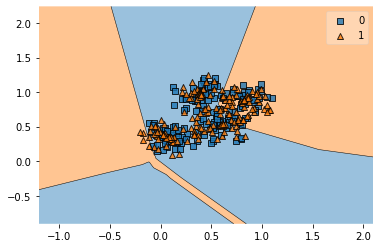

In [596]:
plot_decision_regions(X_train[[0,1]].values,y_train.values.astype(int),clf=model9_)

In [597]:
metrics.accuracy_score(y_train,pred9)

0.5323529411764706

<AxesSubplot:xlabel='0', ylabel='1'>

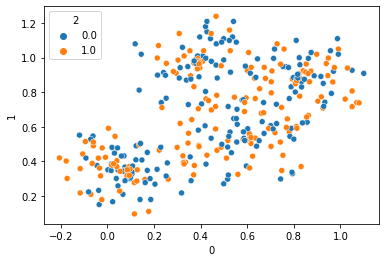

In [598]:
sns.scatterplot(x=X_train[0],y=X_train[1],hue=y_train)

<AxesSubplot:xlabel='0', ylabel='1'>

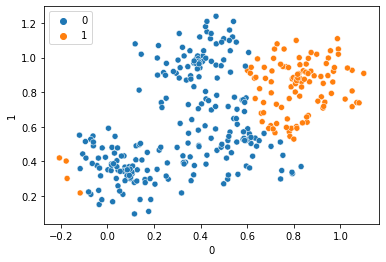

In [599]:
sns.scatterplot(x=X_train[0],y=X_train[1],hue=pred9)

In [ ]:
---------------------